In [3]:
import matplotlib.pyplot as plt
import pandas as pd

## User Input
Change the inputs below
- `csv_path`: The path to where `progress.csv` is stored

In [ ]:
csv_path = "logs/Rylan/masked_ppo_2_v3-Bot/progress.csv" 

## Plotting
Use the below graphs to see if training went well, can refer to notes on healthy behavior and warning signs

In [202]:
df = pd.read_csv(csv_path)
df.head()

,time/total_timesteps,time/fps,time/time_elapsed,rollout/ep_len_mean,time/iterations,rollout/ep_rew_mean,train/learning_rate,train/policy_gradient_loss,train/approx_kl,train/explained_variance,train/clip_range,train/entropy_loss,train/clip_fraction,train/loss,train/value_loss,train/n_updates
0,4096,143,28,248.200000,1,-25.700001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8192,147,55,248.000000,2,-31.031250,0.00005,-0.006011,0.005959,0.098915,0.2,-1.113388,0.052490,6.695733,12.887009,15.0
2,12288,152,80,249.208333,3,-31.875000,0.00005,-0.005191,0.006902,0.680558,0.2,-1.103950,0.043799,3.986734,8.678894,30.0
3,16384,152,107,251.828125,4,-32.726562,0.00005,-0.005973,0.006724,0.918689,0.2,-1.121095,0.059847,0.950264,3.949007,45.0
4,20480,147,138,256.168831,5,-33.305195,0.00005,-0.007768,0.006231,0.957331,0.2,-1.100992,0.052100,0.253997,2.434476,60.0


#### Mean Episode Reward & Episode Length Over Time
✅ Healthy Behavior:
- Reward increases gradually and plateaus — suggests the agent is improving, then stabilizing.
- Episode Length may decrease (if the agent is becoming more efficient) or stabilize at a logical average — Dominion is variable-length, so some fluctuation is fine.

⚠️ Warning Signs:
- Flat reward near zero, agent isn’t learning.
- Reward spikes then crashes, unstable training or overfitting.
- Episode length increases dramatically, could mean indecision or repetitive loops (like invalid action loops).

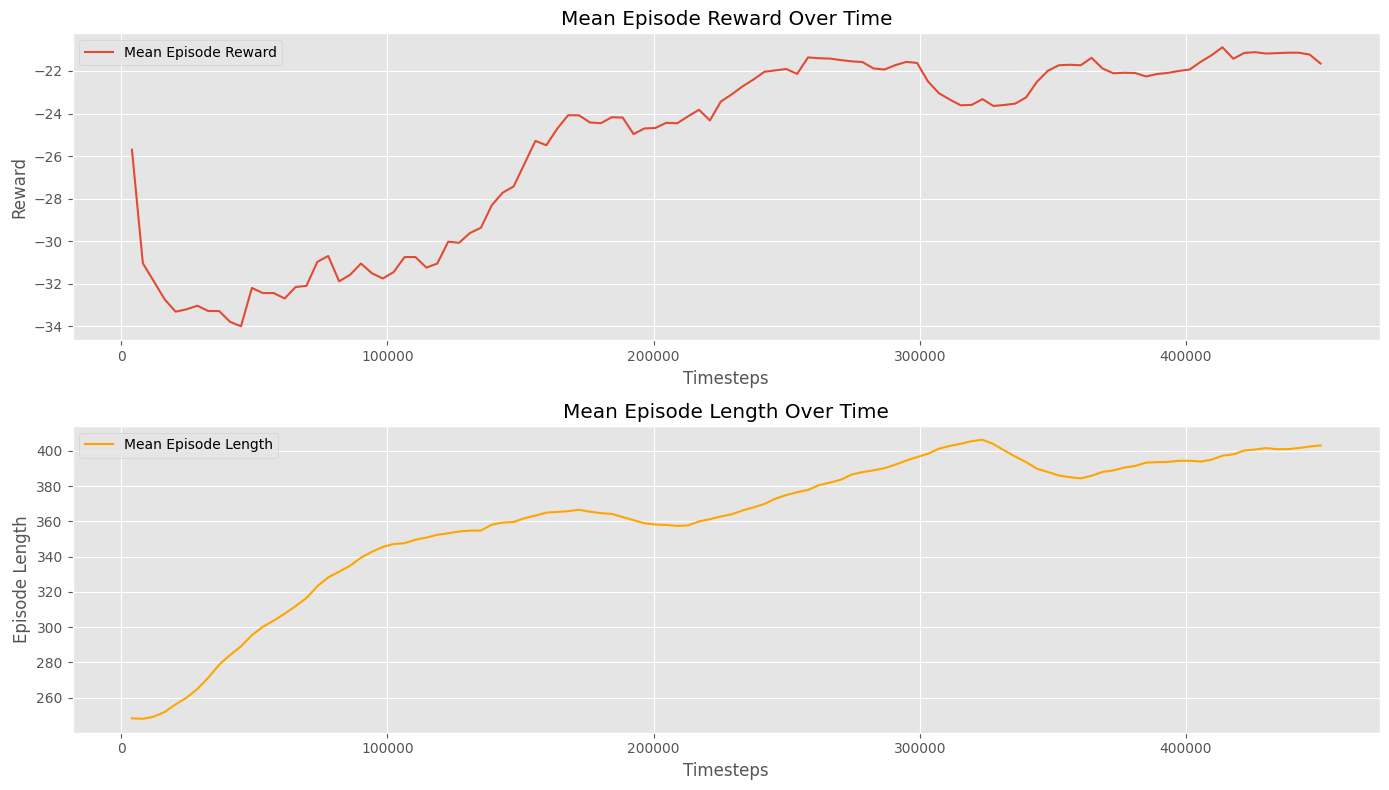

In [203]:
plt.style.use("ggplot")
plt.figure(figsize=(14, 8))

# Plot episode reward and episode length
plt.subplot(2, 1, 1)
plt.plot(df["time/total_timesteps"], df["rollout/ep_rew_mean"], label="Mean Episode Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Mean Episode Reward Over Time")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df["time/total_timesteps"], df["rollout/ep_len_mean"], label="Mean Episode Length", color="orange")
plt.xlabel("Timesteps")
plt.ylabel("Episode Length")
plt.title("Mean Episode Length Over Time")
plt.legend()

plt.tight_layout()
plt.show()


#### Value Function Loss Over Time
✅ Healthy Behavior:
- Value loss should decrease steadily and plateau at a low-ish level.
- Some fluctuation is normal, especially in more stochastic environments like ours.

⚠️ Warning Signs:
- Loss increasing or wildly oscillating, value function is unstable or diverging.
- Loss stuck high, value net can’t approximate expected returns, maybe due to bad rewards or sparse feedback.

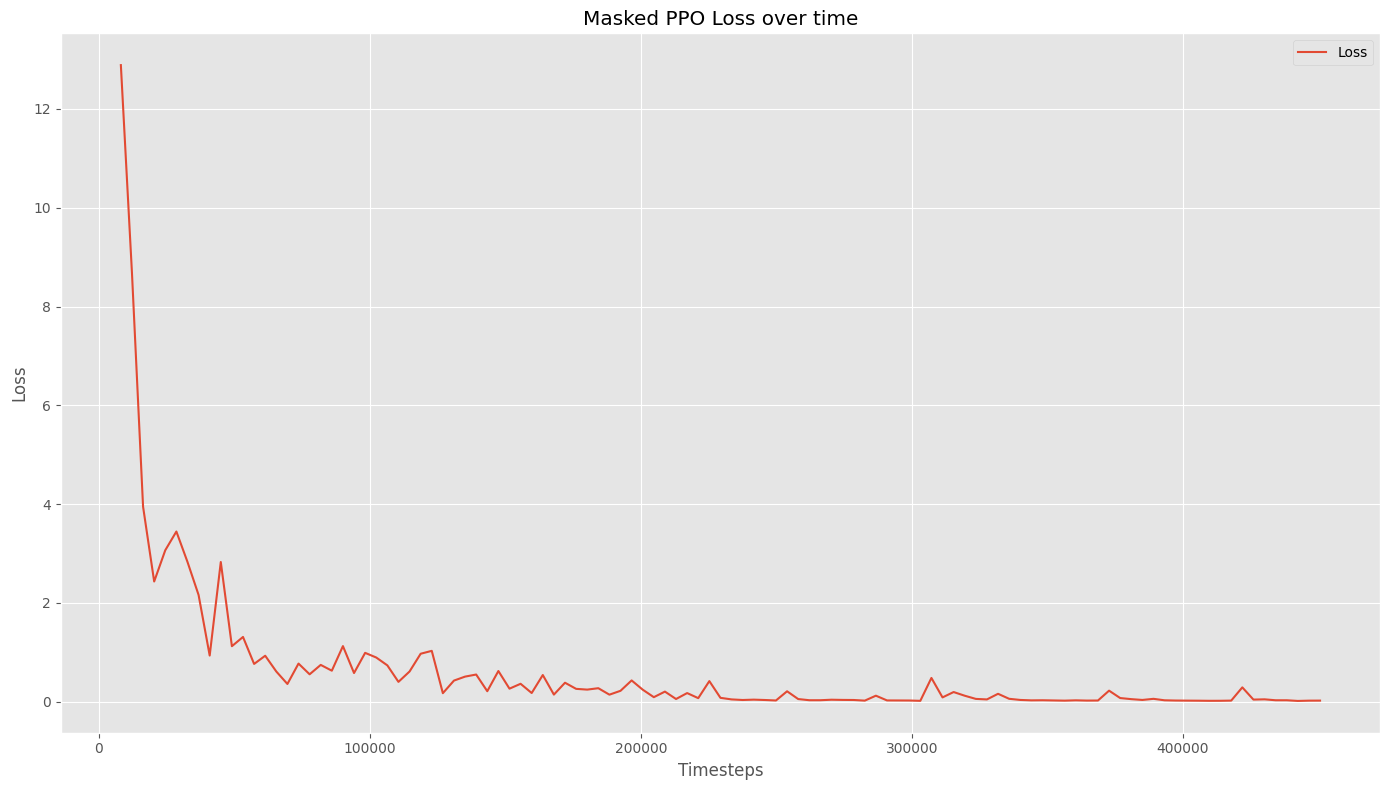

In [204]:
plt.figure(figsize=(14, 8))

# Value function loss
plt.plot(df["time/total_timesteps"], df["train/value_loss"], label="Loss")

plt.xlabel("Timesteps")
plt.ylabel("Loss")
plt.title("Masked PPO Loss over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Policy Gradient Loss & Approximate KL Divergence
✅ Healthy Behavior:
- Policy gradient loss doesn’t need to hit zero — some up-and-down is fine.
- Approx KL should stay small and stable (PPO wants small policy changes).
- A good KL range is ~0.01–0.03. Too high could mean policy is changing too much per update.

⚠️ Warning Signs:
- KL → 0 and policy loss → 0 = policy is frozen or collapsed (can’t/won’t explore anymore).
- KL spikes and loss spikes = unstable or overreactive updates, may need lower learning_rate or smaller clip_range.

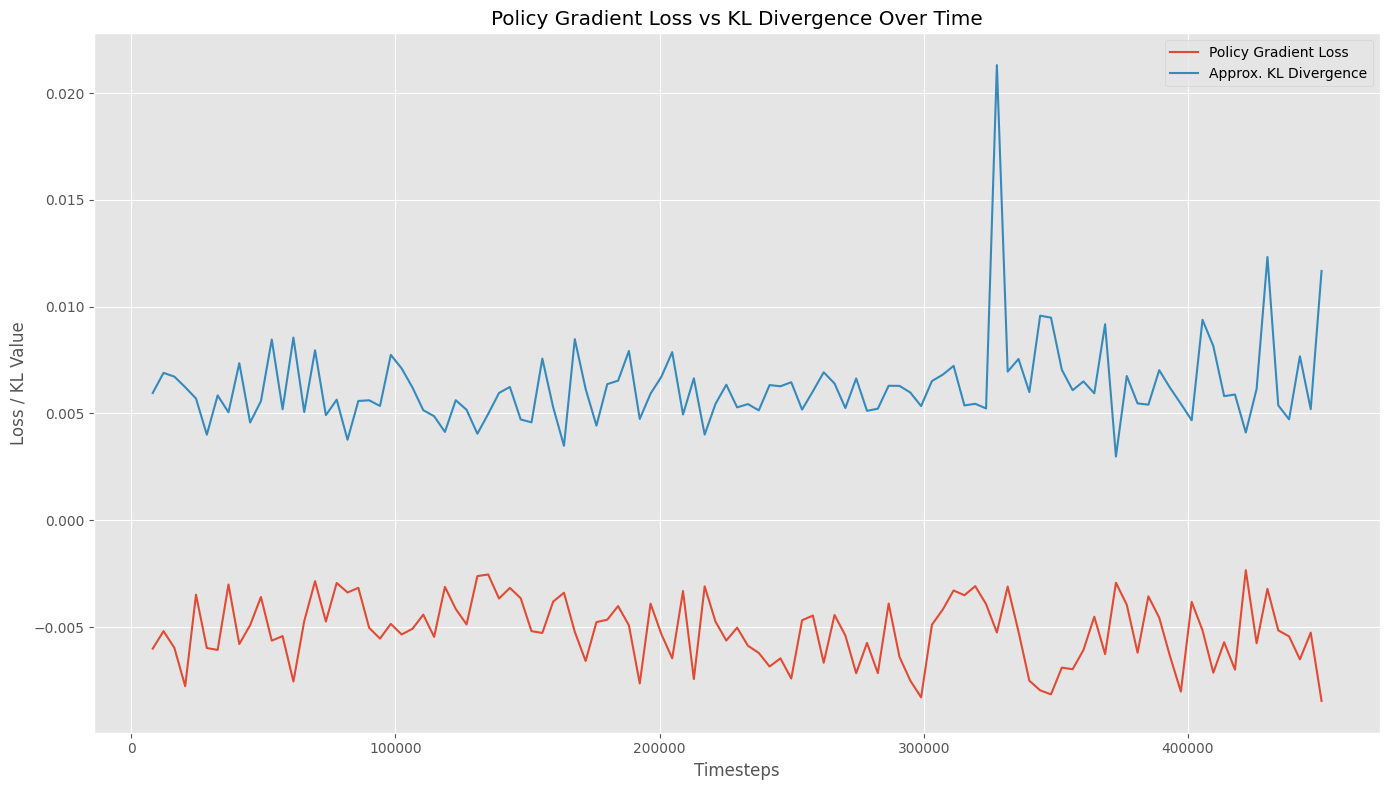

In [205]:
plt.figure(figsize=(14, 8))

# Policy gradient loss
plt.plot(df["time/total_timesteps"], df["train/policy_gradient_loss"], label="Policy Gradient Loss")
# Approximate KL divergence
plt.plot(df["time/total_timesteps"], df["train/approx_kl"], label="Approx. KL Divergence")

plt.xlabel("Timesteps")
plt.ylabel("Loss / KL Value")
plt.title("Policy Gradient Loss vs KL Divergence Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Entropy Loss Over Time
**Note** A value of -2 has more randomness than -0.1 because this is negative policy entropy

✅ Healthy Training Behavior
- Starts low (e.g., -2 to -4), agent is exploring actions randomly.
- Gradually increases toward 0 over time,  agent is becoming more confident, relying on learned policy.
- A smooth curve upward (entropy loss increasing slowly) is a sign of balanced learning 

⚠️ Warning Signs
- Sharp drop then flatlines to 0, policy collapsed too early
- Remains very low, still highly random
- Oscillations, unstable learning

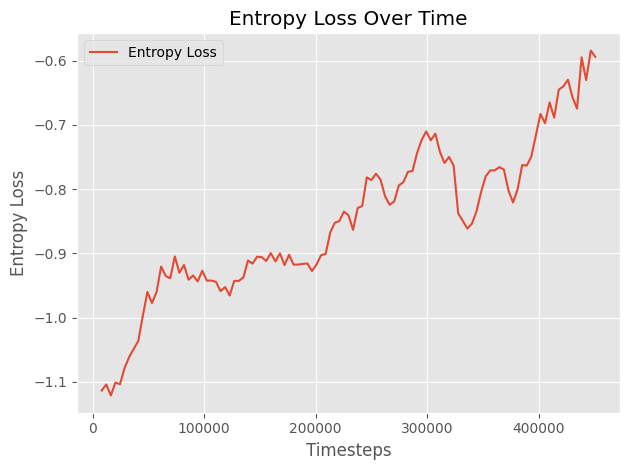

In [206]:
# Entropy Loss
plt.plot(df["time/total_timesteps"], df["train/entropy_loss"], label="Entropy Loss")

plt.xlabel("Timesteps")
plt.ylabel("Entropy Loss")
plt.title("Entropy Loss Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()